<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,57.789130,72.487971,-96.968275,43.308827,154.720421,-111.411594
1,0.0,1.0,89.808727,33.109117,7.076380,139.994225,129.863755,10.130470
2,0.0,2.0,59.020735,77.272797,78.121206,224.414738,163.637957,60.776780
3,0.0,3.0,49.674253,47.051150,-41.244132,65.481271,105.508848,-40.027576
4,0.0,4.0,88.975345,22.913762,11.288222,133.177328,112.924409,20.252920
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.238575,68.420943,135.422658,281.082176,152.743140,128.339036
19996,999.0,16.0,78.082061,81.731396,8.998793,178.812249,176.289097,2.523153
19997,999.0,17.0,52.274649,86.716455,79.943725,228.934829,150.625683,78.309146
19998,999.0,18.0,46.231924,37.844244,-25.123355,68.952813,103.159272,-34.206459


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    57.789130  72.487971  -96.968275   43.308827  154.720421   
      1.0    89.808727  33.109117    7.076380  139.994225  129.863755   
      2.0    59.020735  77.272797   78.121206  224.414738  163.637957   
      3.0    49.674253  47.051150  -41.244132   65.481271  105.508848   
      4.0    88.975345  22.913762   11.288222  133.177328  112.924409   
...                ...        ...         ...         ...         ...   
999.0 15.0   67.238575  68.420943  135.422658  281.082176  152.743140   
      16.0   78.082061  81.731396    8.998793  178.812249  176.289097   
      17.0   52.274649  86.716455   79.943725  228.934829  150.625683   
      18.0   46.231924  37.844244  -25.123355   68.952813  103.159272   
      19.0   77.186937  34.024880  -25.902197   95.309619  135.731133   

                  e_hat  
rep   index              
0.0   0.0   -111.411594  
      1.0     10.130470  
      2.0     60.776780  
      3.0    -40.027576  
      4.0     20.252920  
...                 ...  
999.0 15.0   128.339036  
      16.0     2.523153  
      17.0    78.309146  
      18.0   -34.206459  
      19.0   -40.421514  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    57.789130  72.487971  -96.968275   43.308827  154.720421   
      1.0    89.808727  33.109117    7.076380  139.994225  129.863755   
      2.0    59.020735  77.272797   78.121206  224.414738  163.637957   
      3.0    49.674253  47.051150  -41.244132   65.481271  105.508848   
      4.0    88.975345  22.913762   11.288222  133.177328  112.924409   
...                ...        ...         ...         ...         ...   
999.0 15.0   67.238575  68.420943  135.422658  281.082176  152.743140   
      16.0   78.082061  81.731396    8.998793  178.812249  176.289097   
      17.0   52.274649  86.716455   79.943725  228.934829  150.625683   
      18.0   46.231924  37.844244  -25.123355   68.952813  103.159272   
      19.0   77.186937  34.024880  -25.902197   95.309619  135.731133   

                  e_hat  
rep   index              
0.0   0.0   -111.411594  
      1.0     10.130470  
      2.0     60.776780  
      3.0    -40.027576  
      4.0     20.252920  
...                 ...  
999.0 15.0   128.339036  
      16.0     2.523153  
      17.0    78.309146  
      18.0   -34.206459  
      19.0   -40.421514  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,57.789130,72.487971,-96.968275,43.308827,154.720421,-111.411594
1,0.0,1.0,89.808727,33.109117,7.076380,139.994225,129.863755,10.130470
2,0.0,2.0,59.020735,77.272797,78.121206,224.414738,163.637957,60.776780
3,0.0,3.0,49.674253,47.051150,-41.244132,65.481271,105.508848,-40.027576
4,0.0,4.0,88.975345,22.913762,11.288222,133.177328,112.924409,20.252920
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.238575,68.420943,135.422658,281.082176,152.743140,128.339036
19996,999.0,16.0,78.082061,81.731396,8.998793,178.812249,176.289097,2.523153
19997,999.0,17.0,52.274649,86.716455,79.943725,228.934829,150.625683,78.309146
19998,999.0,18.0,46.231924,37.844244,-25.123355,68.952813,103.159272,-34.206459


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    57.789130  72.487971  -96.968275   43.308827  154.720421   
      1.0    89.808727  33.109117    7.076380  139.994225  129.863755   
      2.0    59.020735  77.272797   78.121206  224.414738  163.637957   
      3.0    49.674253  47.051150  -41.244132   65.481271  105.508848   
      4.0    88.975345  22.913762   11.288222  133.177328  112.924409   
...                ...        ...         ...         ...         ...   
999.0 15.0   67.238575  68.420943  135.422658  281.082176  152.743140   
      16.0   78.082061  81.731396    8.998793  178.812249  176.289097   
      17.0   52.274649  86.716455   79.943725  228.934829  150.625683   
      18.0   46.231924  37.844244  -25.123355   68.952813  103.159272   
      19.0   77.186937  34.024880  -25.902197   95.309619  135.731133   

                  e_hat  
rep   index              
0.0   0.0   -111.411594  
      1.0     10.130470  
      2.0     60.776780  
      3.0    -40.027576  
      4.0     20.252920  
...                 ...  
999.0 15.0   128.339036  
      16.0     2.523153  
      17.0    78.309146  
      18.0   -34.206459  
      19.0   -40.421514  

[20000 rows x 6 columns]

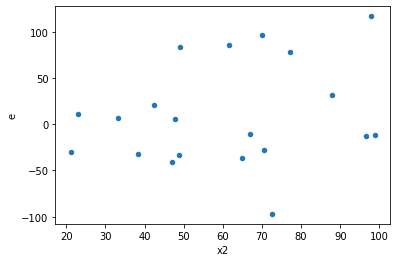

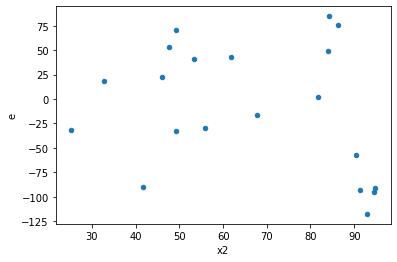

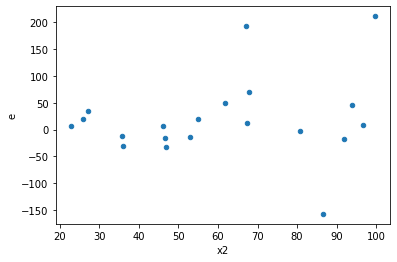

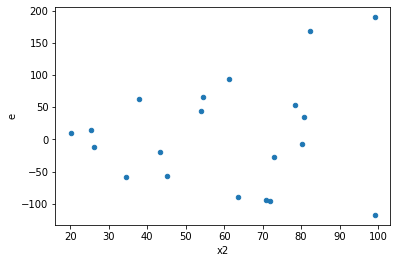

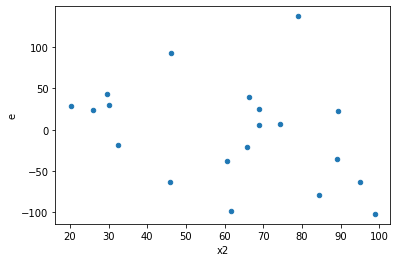

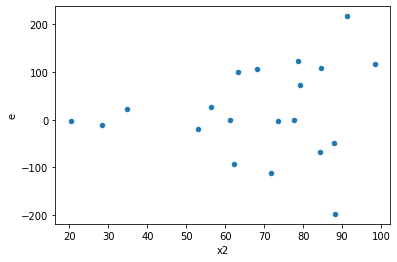

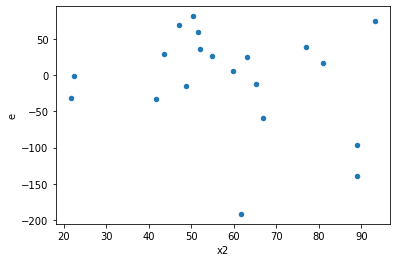

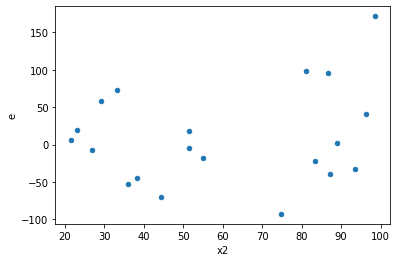

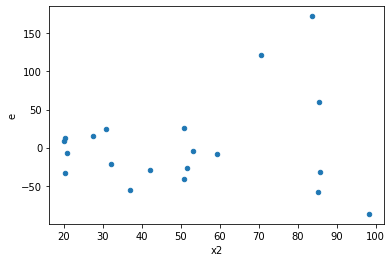

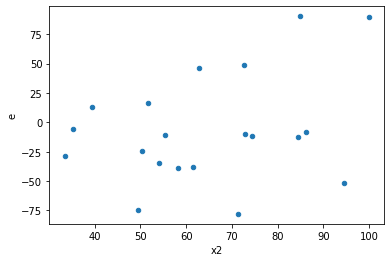

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,9.0,7.0,26096.455121911567,26020.527583777366,2899.6061246568406,3717.2182262539095,1.2819735048303607,0.7599902011110733,0.6200048994444634,0.37999510055553665,Reject005=1 : Homoscedasticity
9.0,7.0,9.0,6122.6208031676,12653.118113742872,874.6601147382286,1405.902012638097,1.6073695243996124,0.4971960370274915,0.7514019814862543,0.24859801851374574,Reject005=1 : Homoscedasticity
10.0,4.0,12.0,6196.507820622604,93593.35630979769,1549.126955155651,7799.446359149807,5.034736716182273,0.02579346624361678,0.9871032668781916,0.01289673312180839,Reject005=0 : Heteroscedasticity
11.0,5.0,11.0,10619.974742975675,70601.90744897674,2123.994948595135,6418.355222634249,3.0218316794394986,0.11746974535307664,0.9412651273234617,0.05873487267653832,Reject005=1 : Homoscedasticity
13.0,10.0,6.0,23692.4432117595,26710.593928605016,2369.24432117595,4451.765654767502,1.8789812494128568,0.454467369298418,0.772766315350791,0.227233684649209,Reject005=1 : Homoscedasticity
15.0,10.0,6.0,16622.829872837112,55083.06377999703,1662.2829872837112,9180.510629999504,5.5228325743747835,0.04866197909992276,0.9756690104500386,0.02433098954996138,Reject005=0 : Heteroscedasticity
17.0,9.0,7.0,33214.2855127839,90926.62309793301,3690.4761680870997,12989.517585419002,3.519740270305529,0.11116964637695714,0.9444151768115214,0.05558482318847857,Reject005=1 : Homoscedasticity
18.0,8.0,8.0,6479.470997099828,33701.01217945298,809.9338746374785,4212.626522431622,5.201198090791261,0.031364690809254636,0.9843176545953727,0.015682345404627318,Reject005=0 : Heteroscedasticity
19.0,7.0,9.0,8210.865165165591,29160.231594860998,1172.9807378807986,3240.025732762333,2.7622156341765884,0.15788963211906237,0.9210551839404688,0.07894481605953119,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,10.0,21655.27991126381,29282.006402285035,3609.2133185439684,2928.2006402285033,0.8113127104966464,0.8314092513778873,Reject005=1 : Homoscedasticity
1.0,9.0,7.0,34398.93489916802,17366.56548943973,3822.103877685336,2480.9379270628187,0.6491026948658636,0.5347021407010587,Reject005=1 : Homoscedasticity
2.0,10.0,6.0,53169.86884136738,22616.191475155167,5316.986884136738,3769.3652458591946,0.7089288215295618,0.6006247315077687,Reject005=1 : Homoscedasticity
3.0,11.0,5.0,71851.58698304949,9640.028638858072,6531.962453004499,1928.0057277716144,0.2951648515500563,0.0853243238293475,Reject005=1 : Homoscedasticity
4.0,9.0,7.0,26096.455121911567,26020.527583777366,2899.6061246568406,3717.2182262539095,1.2819735048303607,0.7599902011110733,Reject005=1 : Homoscedasticity
5.0,11.0,5.0,130348.00124843563,5951.625450634599,11849.81829531233,1190.3250901269198,0.10045091498135465,0.0016966595613195465,Reject005=0 : Heteroscedasticity
6.0,6.0,10.0,22256.99162946883,28897.87415799032,3709.498604911472,2889.7874157990323,0.779023723576248,0.7905453798885436,Reject005=1 : Homoscedasticity
7.0,11.0,5.0,42986.60632474585,12213.390212544917,3907.873302249623,2442.6780425089833,0.6250658231685302,0.4788971516074682,Reject005=1 : Homoscedasticity
8.0,4.0,12.0,22009.84685390003,7714.580496966439,5502.461713475008,642.8817080805366,0.11683528964975443,0.05204428118224719,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      701
Reject005=0 : Heteroscedasticity    299
Name: Result_test, dtype: int64